In [1]:
%load_ext autoreload
%autoreload 2

import sys

# implementation of reverse_shuffle
sys.path.insert(0, "/Users/user/git/eli5/")
import eli5

sys.path.insert(0, "/Users/user/git/datasci")
from sci.metrics import rmse, rmse_score, neg_rmse_score
import sci.plots as scip
import sci.learn as scil
import sci.base as scib

%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10, 6)

import seaborn as sns

import scikitplot as skplt

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
pd.set_option('display.float_format', lambda x: '{:.5f}'.format(x)) #Limiting floats output to 3 decimal points
pd.options.display.max_rows = 1000

random_state = 7

modified eli5
modified PermutationImportance sklearn


/Users/user/miniconda3/envs/test2/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


## Load Data

In [2]:
data_auto = scil.load_data("processed_auto", random_state=random_state)
data_min = scil.load_data("processed_min", random_state=random_state)
data_min_gp = scil.load_data("processed_min_gp", random_state=random_state)
data_my = scil.load_data("processed_my", random_state=random_state)
data_my1 = scil.load_data("processed_my1", random_state=random_state)
data_my2 = scil.load_data("processed_my2", random_state=random_state)
data_my_title = scil.load_data("processed_my_title", random_state=random_state)
data_my_wcg = scil.load_data("processed_wcg", random_state=random_state)

datas = [data_auto, data_min, data_min_gp, data_my, data_my1, data_my2, data_my_title, data_my_wcg]

data = data_min_gp

print("train:", data.X_train.shape)
print("test:", data.X_test.shape)

(891, 10) (891,)
(891, 8) (891,)
(891, 18) (891,)
(891, 40) (891,)
(891, 40) (891,)
(891, 41) (891,)
(891, 5) (891,)
(891, 5) (891,)
train: (712, 18)
test: (179, 18)


## Choose Model

In [3]:
from sklearn.model_selection import *

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.linear_model import *
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import *
from sklearn.ensemble import RandomForestClassifier

import xgboost
from xgboost import XGBClassifier, XGBRegressor

import lightgbm as lgb
from lightgbm import LGBMRegressor

from MeanModels import MeanModelsClassifier, MeanModelsRegressor
from StackingAveragedModels import StackingAveragedModels

from sklearn.preprocessing import *
from sklearn.pipeline import *
from sklearn.base import clone

In [4]:
my_xgb = XGBClassifier()
# process_auto
# my_xgb.set_params(**{'colsample_bylevel': 0.6283406289408499, 'colsample_bytree': 0.9768489288084437, 'gamma': 0.00013008480929036203, 'learning_rate': 0.014982462701190634, 'max_depth': 4, 'min_child_weight': 2, 'n_estimators': 1201, 'reg_alpha': 0.007084216407200271, 'reg_lambda': 1.1962697395436332e-09, 'subsample': 0.8732097955363425})
# process_my
# my_xgb.set_params(**{'colsample_bylevel': 0.523879183576106, 'colsample_bytree': 0.7397190727242723, 'gamma': 0.00012357737669884848, 'learning_rate': 0.35219483890218695, 'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 212, 'reg_alpha': 2.2731114631352405e-09, 'reg_lambda': 4.7067212288526154e-07, 'subsample': 0.9454153229052982})
# process_min
my_xgb.set_params(**{'colsample_bylevel': 0.9808014901570143, 'colsample_bytree': 0.860261396211284, 'gamma': 5.270563879723573e-07, 'learning_rate': 0.14087171600280374, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 343, 'reg_alpha': 2.351393771001955e-09, 'reg_lambda': 3.577008926883625e-05, 'subsample': 0.7179924547533199})
# process_my2
my_xgb.set_params(**{'colsample_bylevel': 0.5530135215601766, 'colsample_bytree': 0.4160641869098963, 'gamma': 9.063000153333795e-08, 'learning_rate': 0.030181318336372876, 'max_depth': 15, 'min_child_weight': 3, 'n_estimators': 76, 'reg_alpha': 0.010831146289605626, 'reg_lambda': 0.0018307439632192874, 'subsample': 0.8634326336665237})
# processed_my_title
my_xgb.set_params(**{'colsample_bylevel': 0.32862863435708783, 'colsample_bytree': 0.23121124073014102, 'gamma': 1.4782632620022436e-07, 'learning_rate': 0.6684291799054103, 'max_depth': 3, 'min_child_weight': 8, 'n_estimators': 70, 'reg_alpha': 0.0019356517067729857, 'reg_lambda': 0.0018045626422453509, 'subsample': 0.6414537932777385})

models_best = {}
models_best['my_xgb'] = my_xgb

model_xgb_bagging_1 = BaggingClassifier(my_xgb, n_estimators=20, max_samples=0.95, bootstrap=False, n_jobs=-2, random_state=random_state) # LB 0.849


model = my_xgb

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.linear_model import SGDClassifier

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

models_sk = {
    "KNN": KNeighborsClassifier(3),
    "SVC-linear": SVC(kernel="linear", C=0.0001316080372376561, probability=True),
    "SVC-rbf-def": SVC(kernel="rbf", probability=True),
    "SVC-rbf1": SVC(kernel="rbf", C=0.3456525257377223, gamma='auto', probability=True),
    "SVC-rbf2": SVC(kernel="rbf", C=9.899681694580002, gamma=9.774612226707497e-06, probability=True),
#     "GaussianProcessClassifier": GaussianProcessClassifier(1.0 * RBF(1.0)), # slow and not very good
    "DecisionTreeClassifier-def": DecisionTreeClassifier(),
    "DecisionTreeClassifier-5": DecisionTreeClassifier(max_depth=5),
    "RandomForestClassifier-def": RandomForestClassifier(),
    "RandomForestClassifier-1": RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    "MLP": MLPClassifier(alpha=1),
    "AdaBoostClassifier": AdaBoostClassifier(),
    "SGDClassifier": SGDClassifier(loss='modified_huber'),
    "GaussianNB": GaussianNB(),
    "BernoulliNB": BernoulliNB(),
    "LDA": LinearDiscriminantAnalysis(),
#     "QDA": QuadraticDiscriminantAnalysis(),
    "LogisticRegression": LogisticRegression(),
    "LogisticRegression2": LogisticRegression(class_weight='balanced', penalty='l1', C=0.1, solver='liblinear'),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "NuSVC": NuSVC(probability=True),
}

models_sk['LogisticRegression'].set_params(**{'solver': 'newton-cg', 'C': 0.10525261119806098, 'intercept_scaling': 0.0004619865290222267, 'tol': 0.009103808108589405})



from mlxtend.classifier import StackingCVClassifier
meanModel_sk = MeanModelsClassifier(dict(models_sk), random_state=1)
stackModel_sk = StackingCVClassifier(list(models_sk.values()), LogisticRegression())
stackModel_sk2 = StackingCVClassifier(list(models_sk.values()), LogisticRegression(), use_probas=True)

models_sk_meta = {}
models_sk_meta['meanModel_sk'] = meanModel_sk
models_sk_meta['stackModel_sk'] = stackModel_sk
models_sk_meta['stackModel_sk2'] = stackModel_sk2

models_sk_all = {**models_sk, **models_sk_meta}


In [6]:
scil.random_state(models_sk, random_state)

In [7]:
# model_lr = LogisticRegression(class_weight='balanced', penalty='l1', C=0.1, solver='liblinear') # LB 0.848
# model_lr_bagging_1 = BaggingClassifier(model_lr, n_estimators=20, max_samples=0.95, bootstrap=False, n_jobs=-2, random_state=random_state) # LB 0.849
# model_lr_bagging_2 = BaggingClassifier(model_lr, n_estimators=25, max_samples=0.97435, bootstrap=True, n_jobs=-2, random_state=random_state) # LB 0.831
# model_lr_bagging_3 = BaggingClassifier(model_lr, n_estimators=12, max_samples=0.8, bootstrap=True, n_jobs=-2, random_state=random_state) # LB 0.828
# model_lr_bagging_4 = BaggingClassifier(model_lr, n_estimators=258, max_samples=0.941283072066677, bootstrap=False, n_jobs=-2, random_state=random_state) # LB 0.848
# model_lr_bagging_5 = BaggingClassifier(model_lr, n_estimators=10000, max_samples=0.95, bootstrap=False, n_jobs=-2, random_state=random_state) # LB 0.849

# model_lr2 = LogisticRegression(class_weight='balanced', penalty='l1', C=0.122, solver='saga') # LB 0.847
# # model_lr_bagging_1 works better than model_lr_bagging_2 on LB, and model_lr_bagging_3 even worse. why?
# # is it the bootstrap tha causes this?


# models_best = {}
# models_best['model_lr'] = model_lr
# # models_best['model_lr_bagging_1'] = model_lr_bagging_1



### Pipeline

In [8]:
# mm = make_pipeline(
# #     SelectFromModel(model_lr, threshold=0.000000001, prefit=False), 
#     make_union(
#         FunctionTransformer(),
#         FunctionTransformer(lambda X: np.power(X, 2)),
#         FunctionTransformer(lambda X: np.exp(X)),
#     ),
#     model_lr)

### end of models

In [9]:
models_comp = {**models_sk, **models_best}

## Setup

In [10]:
from mlxtend.evaluate import BootstrapOutOfBag, RandomHoldoutSplit
from sklearn.metrics import *

metric = accuracy_score
scoring = 'accuracy'

scib.metric_global = metric
scib.scoring_global = scoring # make_scorer(scil.metric_global, needs_proba=True)

# format
# cv_{total_splits}_{train/test-fold}
cv_1_10 = RandomHoldoutSplit(valid_size=0.1, stratify=True, random_seed=None)
cv_5_5 = 5
cv_10_10 = 10
cv_1000_10 = RepeatedStratifiedKFold(n_splits=10, n_repeats=100)
cv_1000_20 = RepeatedStratifiedKFold(n_splits=20, n_repeats=50)

cv_single = cv_1_10
cv_fast = cv_10_10
cv_slow = cv_1000_20

## Analyze

CV for processed_auto ..
CV for processed_min ..
CV for processed_min_gp ..
CV for processed_my ..
CV for processed_my1 ..
CV for processed_my2 ..
CV for processed_my_title ..


,mean,std
processed_my2,0.81826,0.01490
processed_auto,0.81823,0.01170
processed_my,0.81491,0.01499
processed_my1,0.81491,0.01499
processed_min,0.79910,0.01567
processed_min_gp,0.79471,0.01489
processed_my_title,0.78230,0.01372


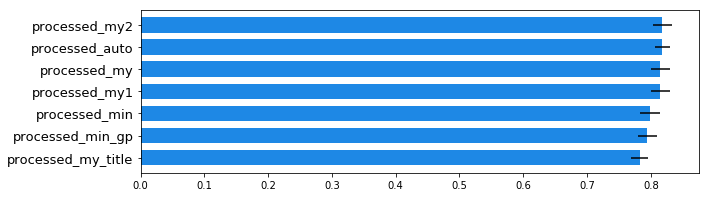

In [152]:
res = scil.score_cv(datas, my_xgb, scoring, cv=cv_fast)

In [130]:
# scil.comp_models_ttest(data, my_xgb, model_xgb_bagging_1)

t statistic: 0.605
p value: 0.550


In [132]:
# scil.score_leave_one_out(data, LogisticRegression(), metric, proba=False)

0.8294051627384961

## Models Scatter

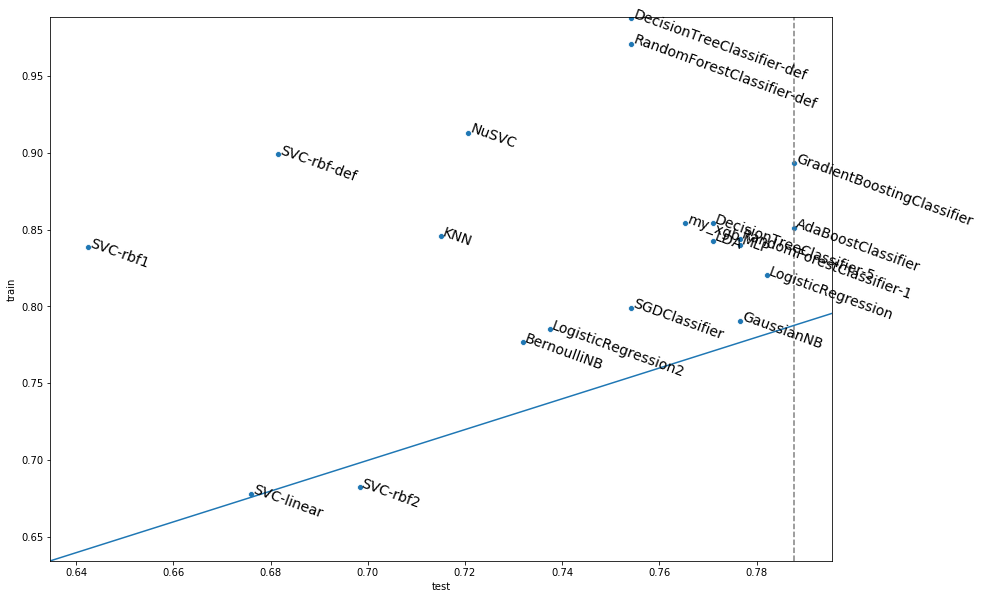

In [12]:
scip.models_train_test_scatter(data, models_comp)

## Learning Curve

In [153]:
model = my_xgb
scil.fit(data, model)

fitting XGBClassifier ..


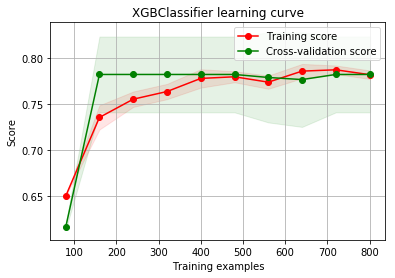

In [154]:
scip.learning_curve(data, model, scoring=scoring, n_iter=10, cv=cv_fast)

## Model Calibration

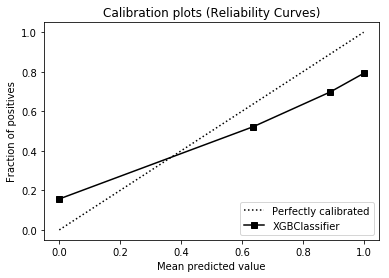

In [155]:
scip.calibration(data, model)

## Model Curves

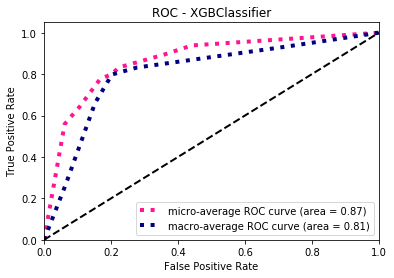

In [156]:
scip.roc_curve(data, model)

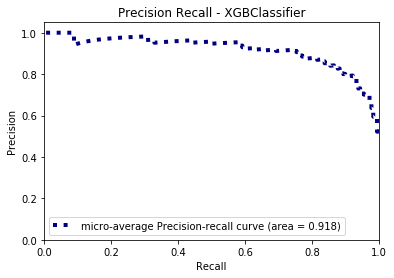

In [122]:
scip.precision_recall_curve(data, model)

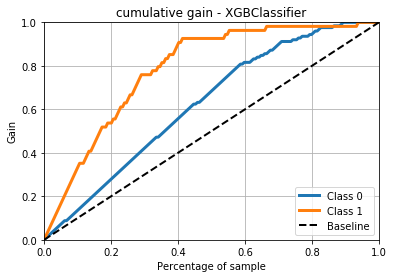

In [123]:
scip.cumulative_gain(data, model)

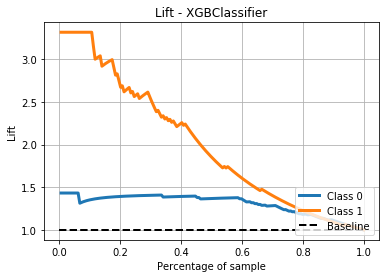

In [124]:
scip.lift_curve(data, model)

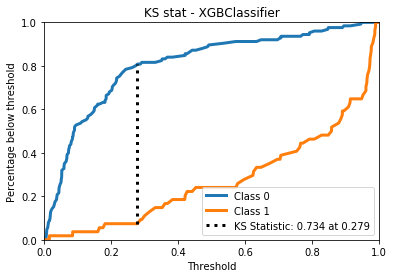

In [125]:
scip.ks_statistic(data, model)

## Feature Importance

inverse_shuffle base_score: 0.5439 +/- 0.0056


Title_Mr_             21.01308
Age                   16.11467
Sex_female            13.72112
fare_norm             13.05316
Fare                  10.99360
Pclass                 8.21041
deck_None              2.97801
age_group__25__35_     2.81102
Embarked_C             2.31005
group_size2            1.69775
Name_has_paren         1.39159
age_group__35__45_     1.19677
SibSp                  0.86279
Title_Miss_            0.83496
Embarked_S             0.64013
group_size             0.64013
age_group__18__25_     0.64013
Parch                  0.55664
has_cabin              0.41748
Sex_male               0.02783
age_group__45__120_    0.00000
Embarked_Q             0.00000
deck_T                 0.00000
deck_G                 0.00000
deck_F                 0.00000
Name_has_quote         0.00000
deck_E                 0.00000
deck_D                 0.00000
deck_C                 0.00000
age_group__2__6_       0.00000
Title_Master_          0.00000
deck_B                 0.00000
deck_A  

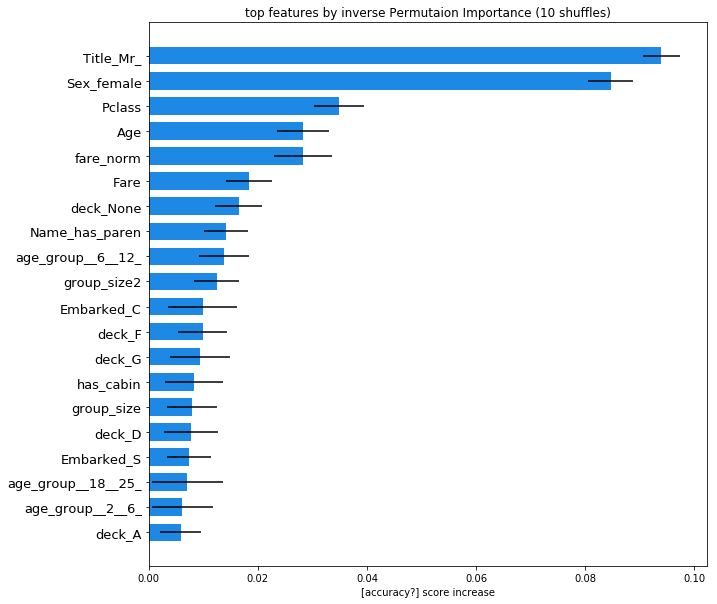

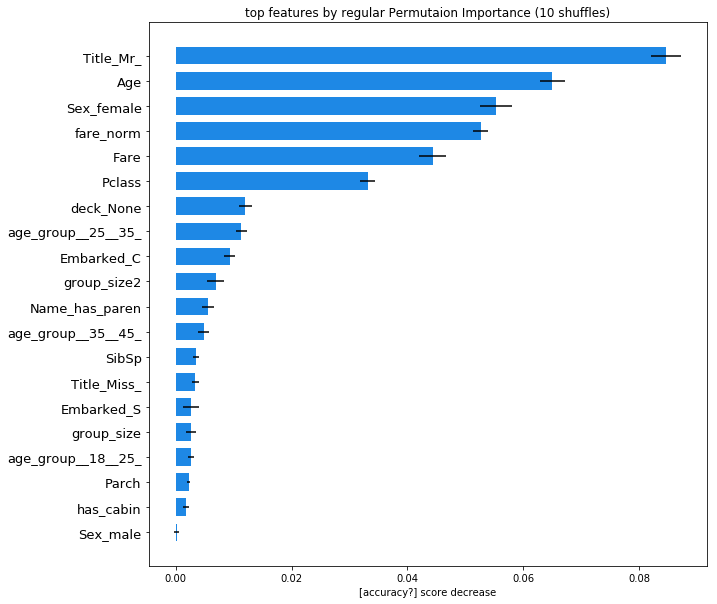

In [126]:
scil.get_top_features_by_permutation_importance(data, model, True, scoring, show=True)
scil.get_top_features_by_permutation_importance(data, model, False, scoring, show=True)

## Incremental Model Combination

In [48]:
# # cv = 5
# models = models_comp
# scoring = scil.scoring_global

# try:
#     scores = scil.score(data, models, scoring, show=False)
#     print('using existing fit for model scores')
# except:
#     print('fitting to get model scores')
#     scores = scil.fit_score(data, models, scoring, show=False)
    
# sorted_scores = sorted(scores.items(), key=lambda kv: -kv[1])

# sub_models = {}
# scores_inc = []
# names_inc = []
# for k, _ in sorted_scores:
#     sub_models[k] = models[k]
#     meanModel = MeanModelsClassifier(dict(sub_models), fit_models=False)
#     score = scil.fit_score(data, meanModel, scoring, show=False)['MeanModelsClassifier']
#     scores_inc.append(score)
#     names_inc.append(k)
    
    
# res = pd.Series(scores_inc, index=names_inc)

# res
    

fitting to get model scores
fitting KNN ..
fitting SVC-linear ..
fitting SVC-rbf-def ..
fitting SVC-rbf1 ..
fitting SVC-rbf2 ..
fitting GaussianProcessClassifier ..
fitting DecisionTreeClassifier-def ..
fitting DecisionTreeClassifier-5 ..
fitting RandomForestClassifier-def ..
fitting RandomForestClassifier-1 ..
fitting MLP ..
fitting AdaBoostClassifier ..
fitting SGDClassifier ..
fitting GaussianNB ..
fitting BernoulliNB ..
fitting LDA ..
fitting QDA ..
fitting LogisticRegression ..


KeyboardInterrupt: 

In [51]:
# cv = 5
models = models_comp
scoring = scil.scoring_global
cv = cv_fast

scores = scil.score_cv(data, models, scoring, show=False, cv=cv)
scores_mean = scores.mean().sort_values(ascending=False)    

sub_models = {}
scores_inc = []
names_inc = []
for k, _ in scores_mean.items():
    sub_models[k] = models[k]
    meanModel = MeanModelsClassifier(dict(sub_models), fit_models=True, random_state=1)
    score = scil.score_cv(data, meanModel, scoring, show=False, cv=cv).iloc[:, 0]
    scores_inc.append(score)
    names_inc.append(k)
    
    
res = pd.Series(scores_inc, index=names_inc)

res
    

CV for MeanModelsClassifier ..
CV for MeanModelsClassifier ..
CV for MeanModelsClassifier ..
CV for MeanModelsClassifier ..
CV for MeanModelsClassifier ..
CV for MeanModelsClassifier ..
CV for MeanModelsClassifier ..
CV for MeanModelsClassifier ..
CV for MeanModelsClassifier ..
CV for MeanModelsClassifier ..
CV for MeanModelsClassifier ..
CV for MeanModelsClassifier ..
CV for MeanModelsClassifier ..
CV for MeanModelsClassifier ..
CV for MeanModelsClassifier ..
CV for MeanModelsClassifier ..
CV for MeanModelsClassifier ..
CV for MeanModelsClassifier ..
CV for MeanModelsClassifier ..
CV for MeanModelsClassifier ..
CV for MeanModelsClassifier ..
CV for MeanModelsClassifier ..


my_xgb                        0   0.81111
1   0.78889
2   0.83146
3   0.8651...
LogisticRegression            0   0.81111
1   0.77778
2   0.82022
3   0.8764...
LDA                           0   0.80000
1   0.73333
2   0.83146
3   0.8651...
GradientBoostingClassifier    0   0.80000
1   0.72222
2   0.83146
3   0.8651...
AdaBoostClassifier            0   0.80000
1   0.72222
2   0.83146
3   0.8651...
RandomForestClassifier-1      0   0.80000
1   0.72222
2   0.83146
3   0.8876...
RandomForestClassifier-def    0   0.81111
1   0.73333
2   0.80899
3   0.8651...
DecisionTreeClassifier-5      0   0.81111
1   0.72222
2   0.82022
3   0.8539...
BernoulliNB                   0   0.81111
1   0.72222
2   0.80899
3   0.8876...
GaussianNB                    0   0.81111
1   0.71111
2   0.80899
3   0.8764...
LogisticRegression2           0   0.81111
1   0.71111
2   0.80899
3   0.8764...
GaussianProcessClassifier     0   0.81111
1   0.72222
2   0.80899
3   0.8764...
NuSVC                         0   0.8111

name: 	g	mean:	0.7695525866427296	std:	0.055026538902844924
name: 	r	mean:	0.8304598848546754	std:	0.04878145398928438


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 <a list of 22 Text xticklabel objects>)

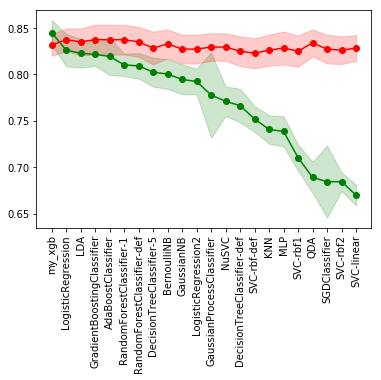

In [54]:
# scores = scores.sort_values(ascending=False)    
scores = scores.iloc[:, np.argsort(-scores.mean())]

mean_scores = pd.DataFrame(scores_inc).T
mean_scores.columns = names_inc

scip.range(scores, "g")
scip.range(mean_scores, "r")
plt.xticks(rotation='vertical')

In [55]:
import matplotlib.pyplot as plt
res.plot()
scores.plot()

TypeError: Empty 'DataFrame': no numeric data to plot

In [ ]:
score2 = sci.fit_score(data, my_stackModel, rmse)

In [162]:
score2 = sci.score(data, stackModel_sk, show=False)
score_stack = score2['StackingCVClassifier']

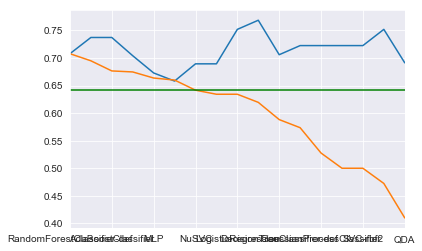

In [163]:
import matplotlib.pyplot as plt
res.plot()
plt.plot([p[1] for p in sorted_scores])

plt.axhline(score_stack, color='g')

## Final & Submit

In [158]:
final_model = model
scil.fit(data, final_model, all_data=True)
y_pred = final_model.predict(data.X_score)
# y_pred = final_model.predict_proba(data.X_score)[:, 1]

y_pred = y_pred.astype(int)

fitting XGBClassifier ..


## Submit

In [159]:
# save submission using samples Ids
index = pd.read_csv('input/gender_submission.csv')["PassengerId"]
df_score = pd.DataFrame({"PassengerId": index, "Survived": y_pred})
df_score.to_csv('input/submission.csv', index=False)